In [ ]:
# !git config --global user.email "wheelessbrian@yahoo.com"
# !git config --global user.name "bwheeless7"
# !git pull
!git add .
!git commit -m "Data generation and EA for banking revenue and forecasting project"
!git push

# Banking Revenue Forecasting & Growth Optimization  
## Data Generation & Exploratory Analysis

**Objective:**  
Build a realistic synthetic banking dataset and explore the key drivers of revenue, growth, and customer behavior.


In [8]:
import numpy as np
import pandas as pd

np.random.seed(42)

In [9]:
n_customers = 5000

customers = pd.DataFrame({
    "customer_id": range(1, n_customers + 1),
    "age": np.random.randint(21, 75, n_customers),
    "income": np.random.normal(70000, 25000, n_customers).clip(20000, 200000),
    "credit_score": np.random.randint(580, 820, n_customers),
    "tenure_months": np.random.randint(1, 120, n_customers),
    "segment": np.random.choice(["Mass", "Affluent", "HNW"], n_customers, p=[0.6, 0.3, 0.1])
})


In [10]:
months = pd.date_range("2022-01-01", "2024-12-01", freq="MS")

records = []

for _, row in customers.iterrows():
    base_spend = np.random.normal(2000, 700)

    for m in months:
        spend = max(0, base_spend * np.random.uniform(0.5, 1.5))
        fee = spend * np.random.uniform(0.005, 0.015)
        interest = spend * np.random.uniform(0.01, 0.02)

        records.append([
            row.customer_id, m, spend, fee, interest
        ])

transactions = pd.DataFrame(records, columns=[
    "customer_id", "month", "spend", "fee_revenue", "interest_revenue"
])


In [14]:
data = transactions.merge(customers, on="customer_id")

data["total_revenue"] = data["fee_revenue"] + data["interest_revenue"]

data.to_csv("/content/drive/MyDrive/data-portfolio/banking-revenue-forecasting/data/banking_revenue_data.csv", index=False)

data.head()


,customer_id,month,spend,fee_revenue,interest_revenue,age,income,credit_score,tenure_months,segment,total_revenue
0,1,2022-01-01,2357.019504,23.865356,37.783218,59,52187.64518,809,112,Mass,61.648574
1,1,2022-02-01,2830.947736,19.581389,54.403616,59,52187.64518,809,112,Mass,73.985005
2,1,2022-03-01,3173.408728,39.005458,51.918332,59,52187.64518,809,112,Mass,90.923789
3,1,2022-04-01,4461.891294,42.669519,63.580718,59,52187.64518,809,112,Mass,106.250237
4,1,2022-05-01,2561.900903,22.074067,32.683969,59,52187.64518,809,112,Mass,54.758036


<Axes: title={'center': 'Total Monthly Revenue'}, xlabel='month'>

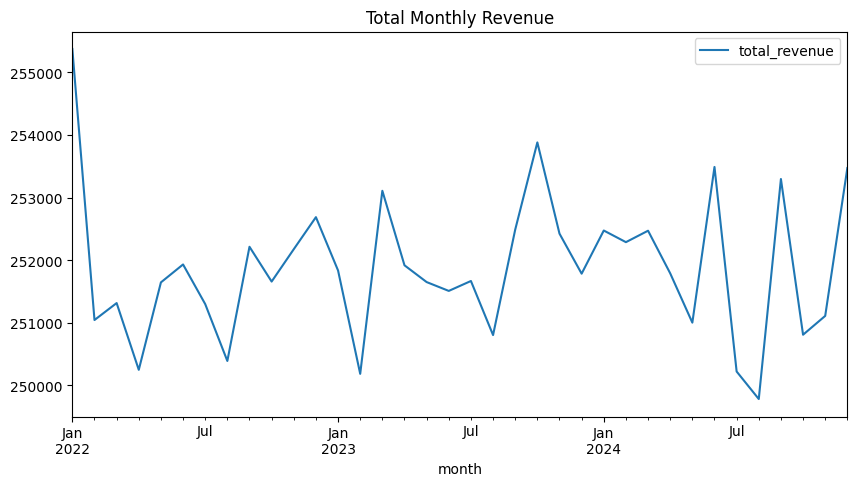

In [15]:
monthly_revenue = data.groupby("month")["total_revenue"].sum().reset_index()

monthly_revenue.plot(x="month", y="total_revenue", figsize=(10,5), title="Total Monthly Revenue")

### Initial Observations

This synthetic dataset simulates a growing banking portfolio with consistent monthly revenue generation.
Seasonality, customer heterogeneity, and behavioral variance are embedded into the data to reflect real-world dynamics.
